<a href="https://colab.research.google.com/github/vinod610/python/blob/master/Horses_vs_Humans_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-11-05 12:26:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   130MB/s    in 1.1s    

2020-11-05 12:26:12 (130 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-11-05 12:26:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-11-05 12:26:12 (114 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

500
527
128
128


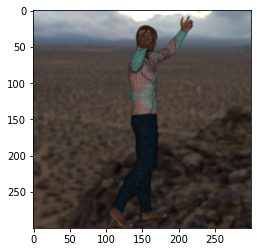

(300, 300, 4)


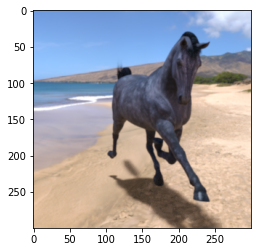

In [ ]:
train_dir ='/tmp/horse-or-human'
train_dir_horses = os.path.join(train_dir,'horses')
print(len(os.listdir(train_dir_horses)))
train_dir_humans = os.path.join(train_dir, 'humans')
print(len(os.listdir(train_dir_humans)))
test_dir  ='/tmp/validation-horse-or-human'
test_dir_horses = os.path.join(test_dir,'horses')
print(len(os.listdir(test_dir_horses)))
test_dir_humans  = os.path.join(test_dir,'humans')
print(len(os.listdir(test_dir_humans)))
#test_dir_humans
for image in os.listdir(train_dir_horses):
  for imageh in os.listdir(train_dir_humans):
    ima = mpimg.imread(os.path.join(train_dir_humans,imageh))
    plt.imshow(ima)
    plt.show()
    break
    
  img = mpimg.imread(os.path.join(train_dir_horses,image))
  print(img.shape)
  plt.imshow(img)
  break


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs.get('loss')<0.002):
      print('\nReached 99% accuracy so cancelling training')
      self.model.stop_training = True


callbacks=myCallback()
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1024,activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
])

model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

data_gen = ImageDataGenerator(rescale=1/255)
valid_gen = ImageDataGenerator(rescale=1/255)
train_data = data_gen.flow_from_directory(train_dir, target_size=(150,150), batch_size=128,class_mode='binary')
test_data  = valid_gen.flow_from_directory(test_dir, target_size=(150,150), batch_size=32, class_mode='binary')

history = model.fit(train_data, steps_per_epoch=8, epochs=20, validation_data= test_data, validation_steps=8, callbacks=[callbacks])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)            

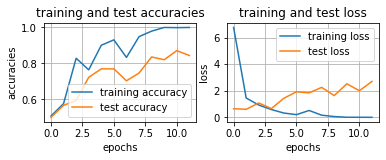

In [ ]:
accu = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accu))
plt.subplot(2,2,1)
plt.plot(epochs,accu, label="training accuracy")
plt.plot(epochs,val_acc, label="test accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracies')
plt.title("training and test accuracies")
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs,loss, label="training loss" )
plt.plot(epochs, val_loss, label="test loss")
plt.xlabel("epochs")
plt.ylabel('loss')
plt.title("training and test loss")
plt.grid()
plt.legend()
